In [1]:
!pip install plotly
!pip install seaborn
!pip install matplotlib
!pip install scipy

You should consider upgrading via the 'c:\users\lefteris\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\lefteris\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\lefteris\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\lefteris\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv("data/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [3]:
#fill NA values with forward fill
df_filled = df.groupby('country').fillna(method='ffill') # ffill: propagate last valid observation forward

#the rest NA values can be set to 0
df_filled.fillna(0, inplace=True) # Replace NaN->0's
df_filled["country"] = df["country"]

#reorder columns for ease of use
cols_to_order = ['country', 'iso_code', 'date', 'vaccines']
new_columns = cols_to_order + (df_filled.columns.drop(cols_to_order).tolist())
df_filled = df_filled[new_columns]
df_filled.head()

,country,iso_code,date,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website
0,Afghanistan,AFG,2021-02-22,Oxford/AstraZeneca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,Oxford/AstraZeneca,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,Oxford/AstraZeneca,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,Oxford/AstraZeneca,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,Oxford/AstraZeneca,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [4]:
vaccines = df_filled.vaccines.unique()
for v in vaccines:
    countries = df_filled.loc[df_filled.vaccines==v, 'country'].values
    print(f"Vaccines: {v}: \nCountries: {(np.unique(countries))}\n")

Vaccines: Oxford/AstraZeneca: 
Countries: ['Afghanistan' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belize' 'Bhutan' 'Botswana' 'Brunei'
 'Cape Verde' 'Comoros' "Cote d'Ivoire" 'Democratic Republic of Congo'
 'Djibouti' 'Dominica' 'Eswatini' 'Ethiopia' 'Falkland Islands' 'Fiji'
 'Gambia' 'Georgia' 'Ghana' 'Grenada' 'Guyana' 'Jamaica' 'Kosovo'
 'Lesotho' 'Malawi' 'Mali' 'Mauritius' 'Montserrat' 'Myanmar' 'Nauru'
 'Nigeria' 'Papua New Guinea' 'Saint Helena' 'Saint Kitts and Nevis'
 'Saint Lucia' 'Saint Vincent and the Grenadines' 'Samoa'
 'Sao Tome and Principe' 'Sierra Leone' 'Solomon Islands' 'South Sudan'
 'Sudan' 'Suriname' 'Taiwan' 'Timor' 'Togo' 'Tonga' 'Trinidad and Tobago'
 'Uganda' 'Uzbekistan' 'Vietnam' 'Zambia']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V: 
Countries: ['Albania' 'Bosnia and Herzegovina']

Vaccines: Sputnik V: 
Countries: ['Algeria' 'Armenia' 'Belarus' 'Guinea' 'Kazakhstan' 'Paraguay' 'Syria'
 'Venezuela

In [5]:
# Some Funtions For Plotting Several Data 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from plotly.offline import iplot


cols_data = []
total_data = []
df_by_country = []

for country in np.unique(df['country']):
    df_by_country.append(df[df['country']==country])

def bars(data, x, y, title, figsize=(10, 12), rotation=75, size=8, width=None, height=None, colour=None):
    count = pd.DataFrame({x:data[x], y:data[y]}).sort_values(ascending=False, by=y)
    if not colour == None:
        c = count[colour]
    else:
        c = None
    fig = px.bar(count, x=x, y=y, title=title, width=width, height=height, color=c)
    fig.show()
    
def scatter(countries, col, threshold):
    i = 0
    fig = go.Figure()
    for country in countries:
        if list(df[df['country']==country][col])[-1]<threshold:
            if i % 2 == 0:
                i += 1
                continue
        i += 1
        df_temp = df[df['country']==country]
        trace = go.Scatter(x=df_temp['date'], y=df_temp[col], 
                           name=country,
                           mode='markers+lines')
        fig.add_trace(trace)
    fig.update_layout(legend_title=dict(text='Countries', font=dict(family="sans-serif",
                                         size=18)))
    fig.update_xaxes(title='date')
    fig.update_yaxes(title=col)
    fig.show()
    
def pie(data, x, y, title):
    data = pd.DataFrame({x:data.keys(), y:data.values()}).sort_values(ascending=False, by=y)
    fig = px.pie(data, values=y, names=x)
    fig.update_layout(legend_title=dict(text=title, font=dict(family="sans-serif",
                                         size=18)))
    fig.show()
    
def nulls(name, threshold, length):
    countries = np.array([])
    usable = 0
    for i in df_by_country:
        i = i.reset_index(drop=True)
        col = i[name]
        num_null = col.isnull().sum()
        col_len = len(col.index)
        usability = round(num_null/col_len*100, 2)<threshold
        if usability and col_len>length:
            usable += 1
            countries = np.append(countries, i['country'][0])
    return countries, name

def last_item(col):
    total_vaccs = []
    for country in df_by_country:
        total_vaccs.append(np.array(country[col])[-1])
    data = dict(zip(np.unique(df['country']), total_vaccs))
    return data

def preprocess(col, x, y):
    count = Counter(df[col])
    count = pd.DataFrame({x:count.keys(), y:count.values()}).sort_values(ascending=False, by=y)
    count = dict(zip(count[x], count[y]))
    return count

def bar_pre(col, values):
    k = 0
    for i in df[col]:
        country = df['country'][k]
        for j in i.split(', '):
            if j in values:
                values[j].append(country)
        k += 1
    return values

def bar_col(name, values, colour=False):
    col_data = bar_pre(name, values)
    cols_data.append(list(col_data.keys()))
    temp = []
    for point in list(col_data.keys()):
        column = 'days using '+point
        count = Counter(col_data[point])
        data = pd.DataFrame({'countries':count.keys(), column:count.values()})
        temp.append(data)
        if colour:
            c = column
        else:
            c = None
        bars(data, 'countries', column, 'Countries who use '+point, colour=c)
    total_data.append(temp)

In [6]:
df = df_filled

In [7]:
for i in [['total_vaccinations', 10, 15, 1000000],
          ['total_vaccinations_per_hundred', 10, 15, 11],
          ['daily_vaccinations', 2.5, 20, 200000],
          ['daily_vaccinations_per_million', 2.05, 20, 0],
          ['people_fully_vaccinated', 60, 20, 500000],
          ['people_fully_vaccinated_per_hundred', 60, 20, 4]]:
    countries, title = nulls(i[0], i[1], i[2])
    scatter(countries, title, i[3])

In [8]:
count = Counter(df['vaccines'])
count = pd.Series(count).sort_values(ascending=False)[:10]
count = dict(zip(count.keys(), count))
pie(count, 'vaccine', 'days using vaccine', '10 most used vaccine combinations')

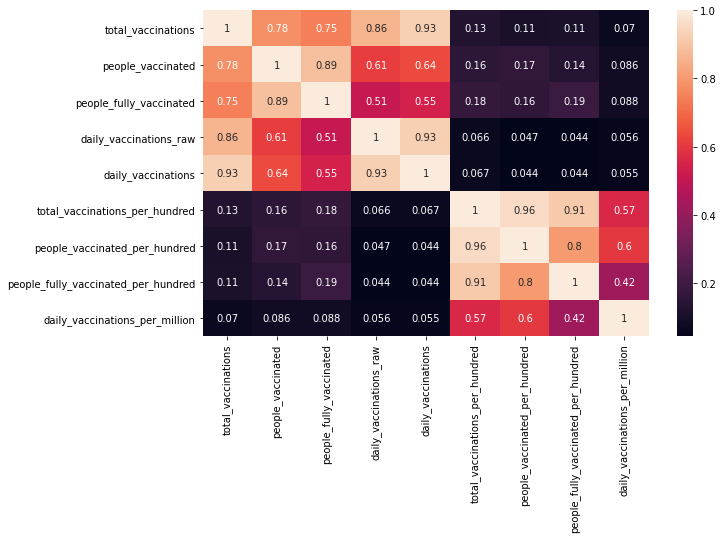

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
THE_DF = pd.read_csv("outputs/complete_df.csv")
THE_DF.drop(["Unnamed: 0"], axis=1, inplace = True)

THE_DF.head()

,country,iso_code,SE.XPD.TOTL.GB.ZS,NY.GDP.MKTP.CD,NY.GDP.MKTP.PP.CD,NY.GDP.PCAP.CD,NY.GDP.PCAP.PP.CD,IT.NET.USER.P2,SP.POP.GROW,SP.POP.TOTL,...,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,AFG,14.091753,1.221864e+10,4.165393e+10,414.755610,1422.970941,3.564658,3.406642,2.781879e+07,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
1,Albania,ALB,10.917204,1.004229e+10,2.429305e+10,3420.031627,8274.102258,30.964406,-0.446379,2.955390e+06,...,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,DZA,11.429410,1.404301e+11,4.326679e+11,3871.858150,12018.055902,14.493390,1.650143,3.555920e+07,...,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0
3,Angola,AGO,8.043970,6.858608e+10,1.164630e+11,2850.269551,4964.238398,4.167828,3.506682,2.243888e+07,...,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0
4,Argentina,ARG,15.794843,3.612707e+11,6.752579e+11,8731.126258,16461.751899,36.869636,1.051542,4.062622e+07,...,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,50.1,100.0,100.0


In [11]:
THE_DF.corr()


,SE.XPD.TOTL.GB.ZS,NY.GDP.MKTP.CD,NY.GDP.MKTP.PP.CD,NY.GDP.PCAP.CD,NY.GDP.PCAP.PP.CD,IT.NET.USER.P2,SP.POP.GROW,SP.POP.TOTL,Oxford/AstraZeneca,Pfizer/BioNTech,...,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
SE.XPD.TOTL.GB.ZS,1.000000,-0.278616,-0.239380,-0.289600,-0.324566,-0.372026,0.230410,-0.054326,-0.113654,-0.351307,...,-0.084255,0.060177,-0.197817,-0.259959,0.248603,-0.390203,-0.262990,-0.437947,-0.043242,-0.277375
NY.GDP.MKTP.CD,-0.278616,1.000000,0.889828,0.433216,0.364943,0.461498,-0.213199,0.270333,0.059834,0.314965,...,-0.057623,-0.393737,0.245538,0.237593,-0.231633,0.061464,0.180153,0.194685,-0.101490,0.047984
NY.GDP.MKTP.PP.CD,-0.239380,0.889828,1.000000,0.269624,0.245073,0.294514,-0.177184,0.637134,0.050992,0.170483,...,-0.066082,-0.234338,0.131695,0.143134,-0.250228,0.032138,0.122311,0.103883,-0.063855,0.008958
NY.GDP.PCAP.CD,-0.289600,0.433216,0.269624,1.000000,0.918790,0.863902,-0.090763,-0.089339,0.096611,0.613181,...,0.244830,-0.592008,0.777558,0.745135,-0.350111,0.366882,0.611583,0.386702,0.036740,0.316272
NY.GDP.PCAP.PP.CD,-0.324566,0.364943,0.245073,0.918790,1.000000,0.809984,0.043949,-0.099066,0.042844,0.630982,...,0.343149,-0.578361,0.668928,0.724506,-0.422053,0.370139,0.580325,0.379418,0.065019,0.385663
IT.NET.USER.P2,-0.372026,0.461498,0.294514,0.863902,0.809984,1.000000,-0.381105,-0.119202,0.143743,0.759613,...,0.330000,-0.604310,0.677920,0.692348,-0.528185,0.540835,0.641220,0.538932,0.106035,0.492736
SP.POP.GROW,0.230410,-0.213199,-0.177184,-0.090763,0.043949,-0.381105,1.000000,0.000604,-0.204643,-0.325091,...,-0.173632,0.112582,-0.143774,-0.160823,0.403208,-0.546551,-0.317785,-0.509114,-0.209210,-0.403784
SP.POP.TOTL,-0.054326,0.270333,0.637134,-0.089339,-0.099066,-0.119202,0.000604,1.000000,0.046259,-0.150765,...,-0.148545,0.168131,-0.090002,-0.104247,-0.065994,-0.108231,-0.073997,-0.113162,-0.026533,-0.148454
Oxford/AstraZeneca,-0.113654,0.059834,0.050992,0.096611,0.042844,0.143743,-0.204643,0.046259,1.000000,0.165550,...,-0.009286,-0.151161,0.025622,0.029267,-0.068616,0.085414,-0.036396,0.081913,-0.089790,-0.003000
Pfizer/BioNTech,-0.351307,0.314965,0.170483,0.613181,0.630982,0.759613,-0.325091,-0.150765,0.165550,1.000000,...,0.373070,-0.529054,0.482307,0.539680,-0.399831,0.472555,0.446469,0.510669,0.139120,0.521131


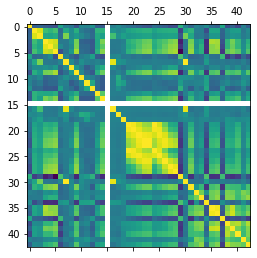

In [12]:
import matplotlib.pyplot as plt

plt.matshow(THE_DF.corr())
plt.show()

<AxesSubplot:title={'center':'THE_DF - Correlation Matrix'}>

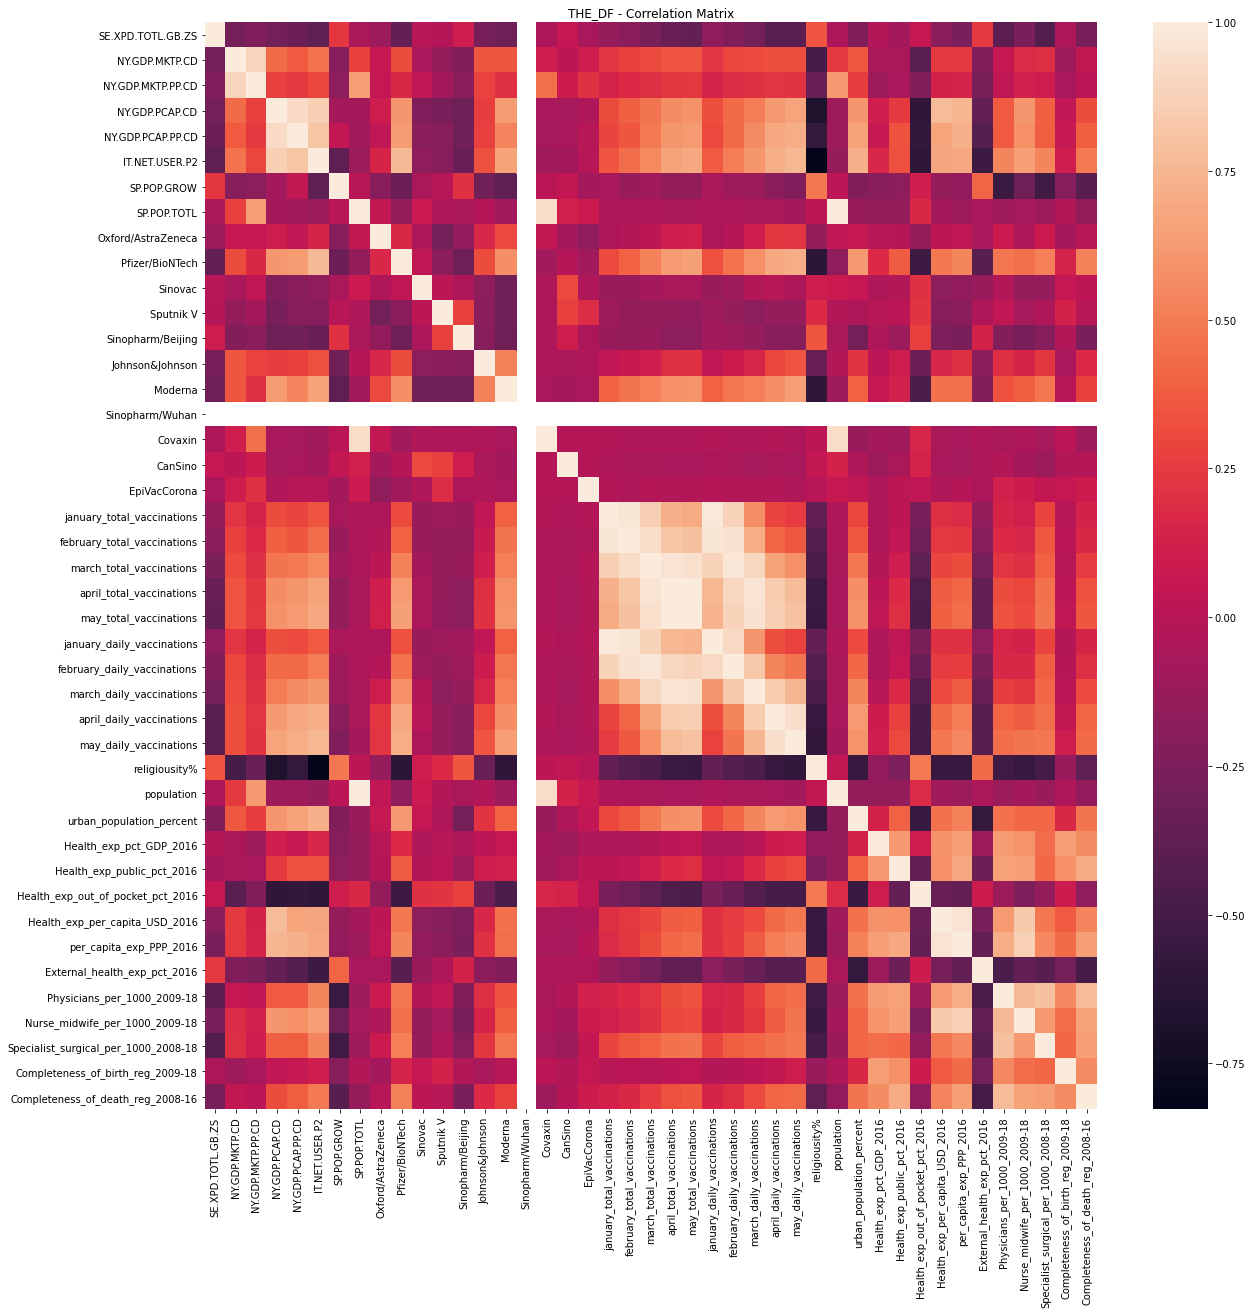

In [13]:
import seaborn as sns


# load the R package ISLR
#infert = com.importr("ISLR")

# calculate the correlation matrix
corr = THE_DF.corr()

# plot the heatmap
plt.figure(figsize=(20,20)) 

plt.title('THE_DF - Correlation Matrix')

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [14]:
THE_DF.columns

Index(['country', 'iso_code', 'SE.XPD.TOTL.GB.ZS', 'NY.GDP.MKTP.CD',
       'NY.GDP.MKTP.PP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.PP.CD',
       'IT.NET.USER.P2', 'SP.POP.GROW', 'SP.POP.TOTL', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinovac', 'Sputnik V', 'Sinopharm/Beijing',
       'Johnson&Johnson', 'Moderna', 'Sinopharm/Wuhan', 'Covaxin', 'CanSino',
       'EpiVacCorona', 'january_total_vaccinations',
       'february_total_vaccinations', 'march_total_vaccinations',
       'april_total_vaccinations', 'may_total_vaccinations',
       'january_daily_vaccinations', 'february_daily_vaccinations',
       'march_daily_vaccinations', 'april_daily_vaccinations',
       'may_daily_vaccinations', 'religiousity%', 'population',
       'urban_population_percent', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000

 ADD CORRELATION & Then K-Means --> In the most correlated 

In [15]:
df_cor1 = THE_DF[['country','religiousity%', 'NY.GDP.PCAP.CD', 'SP.POP.GROW', 'SP.POP.TOTL', 'IT.NET.USER.P2', 'january_total_vaccinations', 'may_total_vaccinations', 'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016', 'Specialist_surgical_per_1000_2008-18',  ]].copy()

In [16]:
#THE_DF.columns

df_cor1 = df_cor1.rename(columns={"NY.GDP.PCAP.CD": "GDP/Capita", "SP.POP.GROW": "PopulationGrowth", 'SP.POP.TOTL':'PopulationTotal','IT.NET.USER.P2':'InternetUsers' })
df_cor1 = df_cor1.rename(columns={"Health_exp_public_pct_2016": "PublicExpedituresOnHealth", "Health_exp_out_of_pocket_pct_2016": "CitizensExpedituresOnHealth", 'Specialist_surgical_per_1000_2008-18':'Surgeons/1000 Citizens'})
df_cor1.head(4)

,country,religiousity%,GDP/Capita,PopulationGrowth,PopulationTotal,InternetUsers,january_total_vaccinations,may_total_vaccinations,PublicExpedituresOnHealth,CitizensExpedituresOnHealth,Surgeons/1000 Citizens
0,Afghanistan,97,414.755610,3.406642,2.781879e+07,3.564658,0.000000,0.000000,5.1,77.4,0.0
1,Albania,39,3420.031627,-0.446379,2.955390e+06,30.964406,0.019081,19.888025,41.4,58.0,11.6
2,Algeria,90,3871.858150,1.650143,3.555920e+07,14.493390,0.000068,0.000000,67.7,30.9,12.1
3,Angola,88,2850.269551,3.506682,2.243888e+07,4.167828,0.000000,0.000000,44.1,35.2,0.0


<AxesSubplot:title={'center':'Correlation Matrix for Selected Variables'}>

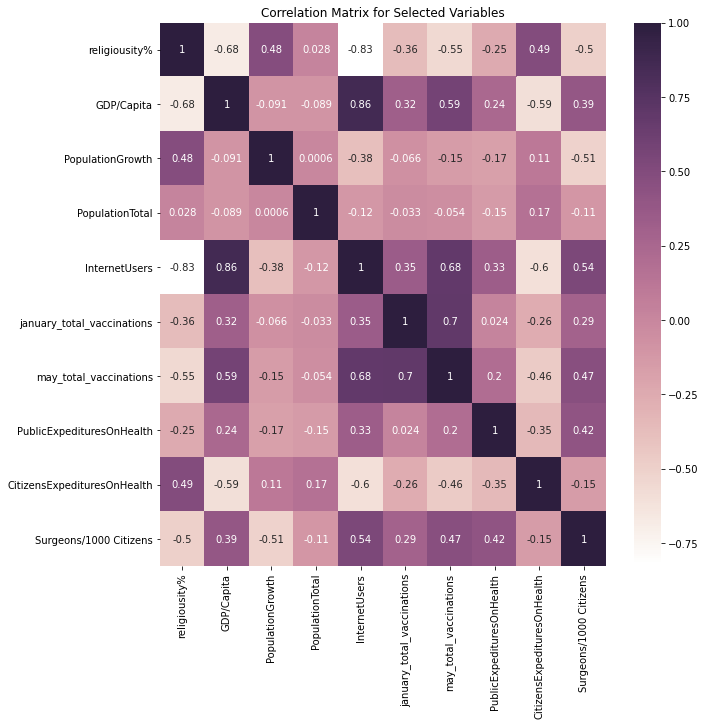

In [17]:
corr = df_cor1.corr()

# plot the heatmap
plt.figure(figsize=(10,10)) 

plt.title('Correlation Matrix for Selected Variables')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(corr,annot=True,cmap=cmap,  xticklabels=corr.columns,yticklabels=corr.columns)